In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import os

# os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED)  

In [5]:
cwd = os.getcwd()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!unzip -n 'drive/My Drive/DeepLearning/Data/Development_Dataset.zip'

Archive:  drive/My Drive/DeepLearning/Data/Development_Dataset.zip


In [8]:
cwd = os.getcwd()
cwd

'/content'

In [9]:
!ls

Development_Dataset  drive  sample_data


TODO caricare anche le altre immagini

In [10]:
train_dir = os.path.join(cwd, 'Development_Dataset/Training')
teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
filenames = []

for team in teams:
  filenames += os.listdir(train_dir + '/' + team + "/Haricot/Images")
  filenames += os.listdir(train_dir + '/' + team + "/Mais/Images")

print(filenames)
print("Training data:", len(filenames))

['Bipbip_haricot_im_04741.jpg', 'Bipbip_haricot_im_03571.jpg', 'Bipbip_haricot_im_06691.jpg', 'Bipbip_haricot_im_00451.jpg', 'Bipbip_haricot_im_05411.jpg', 'Bipbip_haricot_im_03411.jpg', 'Bipbip_haricot_im_03111.jpg', 'Bipbip_haricot_im_04541.jpg', 'Bipbip_haricot_im_06341.jpg', 'Bipbip_haricot_im_06151.jpg', 'Bipbip_haricot_im_05461.jpg', 'Bipbip_haricot_im_03841.jpg', 'Bipbip_haricot_im_00651.jpg', 'Bipbip_haricot_im_05301.jpg', 'Bipbip_haricot_im_03461.jpg', 'Bipbip_haricot_im_05141.jpg', 'Bipbip_haricot_im_03531.jpg', 'Bipbip_haricot_im_02351.jpg', 'Bipbip_haricot_im_03041.jpg', 'Bipbip_haricot_im_06101.jpg', 'Bipbip_haricot_im_02301.jpg', 'Bipbip_haricot_im_07531.jpg', 'Bipbip_haricot_im_01821.jpg', 'Bipbip_haricot_im_04791.jpg', 'Bipbip_haricot_im_05361.jpg', 'Bipbip_haricot_im_06041.jpg', 'Bipbip_haricot_im_08071.jpg', 'Bipbip_haricot_im_01271.jpg', 'Bipbip_haricot_im_01541.jpg', 'Bipbip_haricot_im_05911.jpg', 'Bipbip_haricot_im_06901.jpg', 'Bipbip_haricot_im_07591.jpg', 'Bipbip

In [11]:
# remove .jpg from filenames
filenames = [string[:-4] for string in filenames]

In [12]:
from sklearn.model_selection import train_test_split

filenames_train, filenames_val = train_test_split(filenames,
                                                  test_size=.2,
                                                  shuffle=True,
                                                  random_state=1234)

print("Training data (after split):", len(filenames_train))
print("Validation data:", len(filenames_val))

Training data (after split): 576
Validation data: 144


In [13]:
# cwd = os.getcwd()
dl_dir = '/content/drive/My Drive/DeepLearning/'
splits_dir = os.path.join(dl_dir, 'Splits')

if not os.path.exists(splits_dir):
    os.makedirs(splits_dir)

In [14]:
train_txt = splits_dir + '/train.txt'
val_txt = splits_dir + '/val.txt'

with open(train_txt, 'w') as f:
  for x in filenames_train: 
    f.write(x + '\n')

with open(val_txt, 'w') as f:
  for x in filenames_val: 
    f.write(x + '\n')

21

23

36

23

36

21

21

24

21

24

24

21

23

26

26

36

35

21

39

24

24

26

24

24

36

21

39

24

24

39

39

26

39

21

24

21

21

23

24

23

21

24

26

24

36

24

21

24

21

36

38

23

36

21

39

39

24

26

24

36

24

23

21

21

38

26

24

23

36

23

24

21

21

26

24

24

24

21

23

39

21

24

24

24

24

39

24

23

36

24

21

21

23

21

21

36

21

21

24

23

24

26

38

36

24

35

21

21

21

21

23

24

21

21

21

26

21

26

24

23

21

26

26

23

24

26

24

38

24

36

24

36

24

21

39

39

21

23

36

35

24

39

24

23

24

23

36

21

36

24

23

24

26

24

21

24

21

39

24

24

21

21

23

24

26

23

21

39

21

24

24

24

21

24

37

23

26

26

26

39

38

21

26

24

24

21

38

23

24

35

21

21

24

24

24

21

24

35

26

39

23

36

21

36

21

21

26

26

26

24

24

24

24

24

39

24

39

23

21

26

24

24

24

26

21

23

21

24

35

21

23

21

21

38

23

39

21

39

35

21

24

35

21

23

36

24

24

21

26

24

24

21

23

23

21

21

24

26

36

21

21

36

23

21

21

23

24

24

21

36

38

23

24

24

21

23

23

39

26

24

26

26

23

35

35

35

39

39

23

24

24

38

24

36

21

21

21

35

26

26

21

39

24

24

23

23

24

23

24

21

26

24

26

38

39

23

36

21

24

36

39

36

26

24

21

24

21

26

26

26

24

26

36

21

21

26

23

39

24

36

21

24

24

36

24

23

38

23

23

39

23

38

35

26

26

23

23

26

21

24

21

35

35

21

23

24

21

24

24

24

21

21

39

39

23

39

24

21

23

21

39

26

24

36

39

39

21

36

24

21

26

21

26

23

38

21

21

24

21

24

26

24

24

21

21

21

36

26

39

36

39

39

24

38

21

26

24

21

39

35

36

23

26

36

34

39

23

24

26

23

39

21

21

23

24

39

21

21

36

21

39

21

39

21

24

38

39

24

24

23

23

24

37

21

21

21

24

36

23

23

36

38

21

26

35

24

36

39

21

26

23

21

36

21

24

24

26

21

24

26

36

23

26

26

24

36

21

24

23

26

26

21

21

36

24

39

21

24

38

26

21

24

21

21

21

24

24

21

24

39

36

24

38

21

26

23

39

24

21

24

24

26

24

23

24

24

39

36

39

24

39

21

24

36

23

23

24

24

23

39

26

23

21

24

24

36

36

21

24

23

21

24

39

26

23

24

26

21

21

23

21

26

26

21

36

24

21

24

21

35

35

36

26

24

24

21

21

21

36

39

21

39

21

36

21

36

23

23

24

21

21

23

36

24

24

21

23

23

24

39

23

23

39

23

21

23

24

36

39

21

26

23

24

36

39

26

21

26

26

24

21

39

26

21

21

39

21

23

24

36

24

24

24

23

38

26

24

26

36

36

24

21

26

21

21

24

24

26

23

26

21

26

21

36

26

21

35

26

26

21

26

36

24

36

21

23

24

24

21

24

24

24

26

21

21

21

24

21

36

24

39

21

36

21

36

24

35

21

21

21

38

23

36

23

21

21

26

26

21

24

38

39

36

24

21

21

39

21

24

38

24

39

26

24

21

24

21

26

26

39

# Example: Image Segmentation
## Build segmentation

In [15]:
# ImageDataGenerator
# ------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
# We need two different generators for images and corresponding masks
if apply_data_augmentation:
    img_data_gen = ImageDataGenerator(rotation_range=10,
                                      width_shift_range=10,
                                      height_shift_range=10,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect')
    mask_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='reflect')

In [39]:
def read_rgb_mask(mask_arr):
    '''
    img_path: path to the mask file
    Returns the numpy array containing target values
    '''

    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [216, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

    return new_mask_arr

In [40]:
#dl_dir = '/content/drive/My Drive/DeepLearning/'
#dataset_dir = os.path.join(cwd, 'Development_Dataset/Training/Weedelec/Haricot')
# new dataset_dir = os.path.join(cwd, 'Development_Dataset/Training')
!ls drive/MyDrive

'Copia di 02_Modello report clienti.docx'  'The Sales Song.gdoc'
 dataset_split.json			    the_sales_song.mp3
 DeepLearning


In [41]:
def parse_image_name(filename):
  names = filename.split('_')
  return names[0], names[1].capitalize()

In [42]:
from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):

  '''
    CustomDataset inheriting from tf.keras.utils.Sequence.

    3 main methods:
      - __init__: save dataset params like directory, filenames..
      - __len__: return the total number of samples in the dataset
      - __getitem__: return a sample from the dataset

    Note: 
      - the custom dataset returns a single sample from the dataset. Then, we use 
        a tf.data.Dataset object to group samples into batches.
      - in this case we have a different structure of the dataset in memory. 
        We have all the images in the same folder and the training and validation splits
        are defined in text files.

  '''

  def __init__(self, dl_dir, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=[256, 256]):
    if which_subset == 'training':
      subset_file = os.path.join(dl_dir, 'Splits', 'train.txt')
    elif which_subset == 'validation':
      subset_file = os.path.join(dl_dir, 'Splits', 'val.txt')
    
    with open(subset_file, 'r') as f:
      lines = f.readlines()
    
    subset_filenames = []
    for line in lines:
      subset_filenames.append(line.strip()) 

    self.which_subset = which_subset
    self.dataset_dir = dataset_dir
    self.subset_filenames = subset_filenames
    self.img_generator = img_generator
    self.mask_generator = mask_generator
    self.preprocessing_function = preprocessing_function
    self.out_shape = out_shape

  def __len__(self):
    return len(self.subset_filenames)

  def __getitem__(self, index):
    # Read Image
    curr_filename = self.subset_filenames[index]

    #dataset_dir = os.path.join(cwd, 'Development_Dataset/Training/Weedelec/Haricot')
    team, plant = parse_image_name(curr_filename)
    img_path = self.dataset_dir + '/' + team + '/' + plant
    
    img_extension = '.jpg'
    if(team == 'Roseau'):
      img_extension = '.png'

    img = Image.open(os.path.join(img_path, 'Images', curr_filename + img_extension))
    #mask = Image.open(os.path.join(self.dataset_dir, 'Masks', curr_filename + '.png'))

    # returns np.array
    mask_img = Image.open(os.path.join(img_path, 'Masks', curr_filename + '.png'))
    mask_img = mask_img.resize([256, 256])
    mask_arr = np.array(mask_img)


    mask_arr = read_rgb_mask(mask_arr)

    # Resize image and mask
    img = img.resize(self.out_shape)

    img_arr = np.array(img)

    # in this dataset 255 mask label is assigned to an additional class, which corresponds 
    # to the contours of the objects. We remove it for simplicity.
    #mask_arr[mask_arr == 255] = 0  

    mask_arr = np.expand_dims(mask_arr, -1)

    if self.which_subset == 'training':
      if self.img_generator is not None and self.mask_generator is not None:
        # Perform data augmentation
        # We can get a random transformation from the ImageDataGenerator using get_random_transform
        # and we can apply it to the image using apply_transform
        img_t = self.img_generator.get_random_transform(img_arr.shape, seed=SEED)
        mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=SEED)
        img_arr = self.img_generator.apply_transform(img_arr, img_t)
        # ImageDataGenerator use bilinear interpolation for augmenting the images.
        # Thus, when applied to the masks it will output 'interpolated classes', which
        # is an unwanted behaviour. As a trick, we can transform each class mask 
        # separately and then we can cast to integer values (as in the binary segmentation notebook).
        # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
        out_mask = np.zeros_like(mask_arr)
        for c in np.unique(mask_arr):
          if c > 0:
            curr_class_arr = np.float32(mask_arr == c)
            curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
            # from [0, 1] to {0, 1}
            curr_class_arr = np.uint8(curr_class_arr)
            # recover original class
            curr_class_arr = curr_class_arr * c 
            out_mask += curr_class_arr
    else:
      out_mask = mask_arr
    
    if self.preprocessing_function is not None:
        img_arr = self.preprocessing_function(img_arr)

    return img_arr, np.float32(out_mask)

In [43]:
from tensorflow.keras.applications.vgg16 import preprocess_input 

img_h = 256
img_w = 256

dataset = CustomDataset(dl_dir, train_dir, 'training', 
                        img_generator=img_data_gen, mask_generator=mask_data_gen,
                        preprocessing_function=preprocess_input)
dataset_valid = CustomDataset(dl_dir, train_dir, 'validation', 
                              preprocessing_function=preprocess_input)

In [44]:
train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1])
                                               )

train_dataset = train_dataset.batch(32)

train_dataset = train_dataset.repeat()

valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1])
                                               )
valid_dataset = valid_dataset.batch(32)

valid_dataset = valid_dataset.repeat()

In [45]:
# Let's test data generator
# -------------------------
import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 20)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

iterator = iter(valid_dataset)

[0. 1. 2.]
(256, 256) (256, 256, 3)


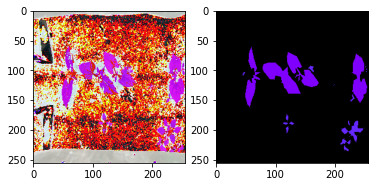

In [85]:
fig, ax = plt.subplots(1, 2)

augmented_img, target = next(iterator)
augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

print(target.shape, target_img.shape)
target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 21):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

In [47]:
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))
for layer in vgg.layers:
  layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

## Convolutional Neural Network (CNN)
### Encoder-Decoder

In [48]:
def create_model(depth, start_f, num_classes):

    model = tf.keras.Sequential()
    
    # Encoder
    # -------
    model.add(vgg)
    
    #start_f = 256
    
    # Decoder
    # -------
    for i in range(depth):
        model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear'))
        model.add(tf.keras.layers.Conv2D(filters=start_f,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same'))
        model.add(tf.keras.layers.ReLU())

        start_f = start_f // 2

    # Prediction Layer
    # ----------------
    model.add(tf.keras.layers.Conv2D(filters=num_classes,
                                     kernel_size=(1, 1),
                                     strides=(1, 1),
                                     padding='same',
                                     activation='softmax'))
    
    return model

In [49]:
model = create_model(depth=5, 
                     start_f=256, 
                     num_classes=21)

# Visualize created model as a table
model.summary()

# Visualize initialized weights
# model.weights

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       1179904   
_________________________________________________________________
re_lu_5 (ReLU)               (None, 16, 16, 256)       0         
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       295040    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 128)      

## Prepare the model for training

In [50]:
# Optimization params
# -------------------

# Loss
# Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
loss = tf.keras.losses.SparseCategoricalCrossentropy() 
# learning rate
lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1,21): # exclude the background class 0
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-7) / (union + 1e-7)
      per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

# Validation metrics
# ------------------
metrics = ['accuracy', meanIoU]
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Training with callbacks

In [ ]:
import os
from datetime import datetime

cwd = os.getcwd()

exps_dir = os.path.join(cwd, 'drive/My Drive/Keras4/', 'multiclass_segmentation_experiments')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'CNN'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)

# Visualize Learning on Tensorboard
# ---------------------------------
tb_dir = os.path.join(exp_dir, 'tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
    
# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             profile_batch=0,
                                             histogram_freq=0)  # if 1 shows weights histograms
callbacks.append(tb_callback)

# Early Stopping
# --------------
early_stop = False
if early_stop:
    es_callback = tf.keras.callback.EarlyStopping(monitor='val_loss', patience=2)
    callbacks.append(es_callback)


model.fit(x=train_dataset,
          epochs=1,  #### set repeat in training dataset
          steps_per_epoch=len(dataset),
          validation_data=valid_dataset,
          validation_steps=len(dataset_valid), 
          callbacks=callbacks)

# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

In [145]:
model.fit(x=train_dataset,
          epochs=1,  #### set repeat in training dataset
          steps_per_epoch=len(dataset),
          validation_data=valid_dataset,
          validation_steps=len(dataset_valid), 
          )

  3/576 [..............................] - ETA: 1:10:21 - loss: 1.3836 - accuracy: 0.6374 - meanIoU: 0.5004

KeyboardInterrupt: ignored

## Test model

## Compute prediction

In [95]:
import time
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

iterator = iter(valid_dataset)

(1, 256, 256, 21)

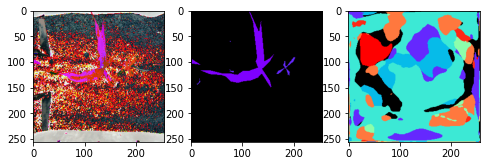

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()
image, target = next(iterator)

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape

predicted_class = predicted_class[0, ...]

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 21):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 21):
  prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

In [97]:
def create_mask_prediction(img_name):

  image = Image.open(img_name).convert('RGB')
  image = image.resize((256, 256))
  image_array = np.array(image)

  prediction = model.predict(tf.expand_dims(image_array, axis=0))
  mask_arr = tf.argmax(prediction, -1)[0, ...] # (256, 256)
  #mask_arr = mask_arr.resize([2048,1536])
  mask_arr = np.array(mask_arr)
  return mask_arr

In [144]:
def rle_encode(img):
    '''
    img: numpy array, 1 - foreground, 0 - background
    Returns run length as string formatted
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    print(runs)
    return ' '.join(str(x) for x in runs)

In [138]:
def parse_image_name(filename):
  names = filename.split('_')
  return names[0], names[1].capitalize()

In [139]:
def mask_arr_to_file(submission_dict, img_name, mask_arr):

  team_name , crop_name = parse_image_name(img_name)  

  img_name = img_name[:-4]

  #appends to json
  submission_dict[img_name] = {}
  submission_dict[img_name]['shape'] = mask_arr.shape
  submission_dict[img_name]['team'] = team_name
  submission_dict[img_name]['crop'] = crop_name
  submission_dict[img_name]['segmentation'] = {}

  rle_encoded_crop = rle_encode(mask_arr == 1)
  rle_encoded_weed = rle_encode(mask_arr == 2)

  submission_dict[img_name]['segmentation']['crop'] = rle_encoded_crop
  submission_dict[img_name]['segmentation']['weed'] = rle_encoded_weed

In [140]:
def write_rgb_mask(mask_arr):
    '''
    img_path: path to the mask file
    Returns the numpy array containing target values
    '''

    new_mask_arr = np.zeros([mask_arr.shape[0], mask_arr.shape[1], 3], dtype=mask_arr.dtype)

    #target_img[np.where(target == 0)] = [0, 0, 0]
    #print(mask_arr.shape, new_mask_arr.shape)


    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(mask_arr == 0)] = [216, 124, 18]
    new_mask_arr[np.where(mask_arr == 1)] = [255, 255, 255]
    new_mask_arr[np.where(mask_arr == 2)] = [216, 67, 82]

    return new_mask_arr

In [ ]:
test_dir = os.path.join(cwd, 'Development_Dataset/Test_Dev/')
teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
crops = ["Haricot" ,"Mais"]
filenames = []
submission_dict = {}

for team in teams:

  for crop in crops:

    filenames = os.listdir(test_dir + team + "/" + crop + "/Images")

    for img_name in filenames:

      path = os.path.join(test_dir, team + "/" + crop + "/Images/" + img_name)
      
      mask_arr = create_mask_prediction(path)
      #mask_arr = write_rgb_mask(mask_arr)
      
      #im = plt.imshow(mask_arr)
      #im.show()

      mask_arr_to_file(submission_dict, img_name, mask_arr)

In [143]:
import json
pred_dir = '/content/drive/My Drive/DeepLearning/Predictions'

if not os.path.exists(pred_dir):
    os.makedirs(pred_dir)

#todo path
with open(pred_dir + '/submission.json', 'w') as f:
  json.dump(submission_dict, f)